### TensorFlow Neural Net Work

##### Running example: Train a two-layer ReLU network on random data with L2 loss

In [1]:
import numpy as np
np.random.seed(0)
import tensorflow as tf

###### Define basic input features and weights (not doing actual computaions yet)

In [2]:
N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,D))
w1 = tf.placeholder(tf.float32, shape=(D,H))
w2 = tf.placeholder(tf.float32, shape=(H,D))
print(x,y,w1,w2)

Tensor("Placeholder:0", shape=(64, 1000), dtype=float32) Tensor("Placeholder_1:0", shape=(64, 1000), dtype=float32) Tensor("Placeholder_2:0", shape=(1000, 100), dtype=float32) Tensor("Placeholder_3:0", shape=(100, 1000), dtype=float32)


###### Define network structure, including the ReLU activation function. (Haven't done any actual computaitons yet.)

In [3]:
h = tf.maximum(tf.matmul(x,w1),0)
y_pred = tf.matmul(h, w2)
diff = y_pred - y
loss = tf.reduce_mean(tf.reduce_sum(diff**2, axis=1))
print(h,y_pred,diff,loss)

Tensor("Maximum:0", shape=(64, 100), dtype=float32) Tensor("MatMul_1:0", shape=(64, 1000), dtype=float32) Tensor("sub:0", shape=(64, 1000), dtype=float32) Tensor("Mean:0", shape=(), dtype=float32)


In [4]:
grad_w1, grad_w2 = tf.gradients(loss,[w1, w2])

###### Start a tenserflow session to actually compute the gradients

In [5]:
with tf.Session() as sess:
    values = {
        #Data goint to feed features
        x: np.random.randn(N,D),
        w1: np.random.randn(D,H),
        w2: np.random.randn(H,D),
        y: np.random.randn(N, D),
    }
    out = sess.run([loss, grad_w1, grad_w2], feed_dict=values)
    loss_val, grad_w1_val, grad_w2_val = out

###### Show results

In [6]:
print(loss_val, grad_w1_val, grad_w2_val)

4.67132e+07 [[  1993.07446289   1433.74084473  -6547.23779297 ...,  -2660.55175781
   -5083.46582031    224.11407471]
 [ -1748.91760254  -9538.86132812  -7128.19775391 ...,   2665.00952148
   -1504.69262695  -1215.81152344]
 [  4001.55053711  -4863.85644531   -216.6546936  ...,  -9496.33300781
    5365.66699219   4971.18554688]
 ..., 
 [  8983.19921875   -195.6338501    6616.16357422 ...,   -137.62329102
    5260.58349609   7846.08203125]
 [  5408.36132812  12963.07421875  -1194.6315918  ...,   6626.21582031
    2942.28613281   1405.20056152]
 [ -4236.54003906  -2246.62133789  -2337.37646484 ...,   2661.86962891
   -8126.07666016  -4260.46337891]] [[-4028.81396484  2075.53540039 -3470.56835938 ...,   980.02172852
  -2151.14501953  -686.86523438]
 [-5455.60449219  1949.5369873  -3633.4699707  ...,  1486.9621582
  -3621.15283203  -696.05957031]
 [-4417.3125       217.93934631 -3687.92773438 ...,   116.03752899
   -301.58145142  -672.34613037]
 ..., 
 [-2987.79418945  2148.71289062  -908.

###### Do an actual training

In [7]:
loss_list = []
time_list = []
with tf.Session() as sess:
    values = {
        x: np.random.randn(N,D),
        w1: np.random.randn(D,H),
        w2: np.random.randn(H,D),
        y: np.random.randn(N,D),
    }
    learning_rate = 1.e-5
    for t in range(50):
        out = sess.run([loss, grad_w1, grad_w2], feed_dict = values)
        loss_val, grad_w1_val, grad_w2_val = out
        loss_list.append(loss_val)
        time_list.append(t)
        values[w1] -= learning_rate * grad_w1_val
        values[w2] -= learning_rate * grad_w2_val

###### Show results

In [8]:
print(values[w1], values[w2])

[[-0.62102481 -0.20429261  0.19363965 ...,  1.31852027  1.8865433
  -0.81358832]
 [ 1.00092098  0.28517535  0.76765162 ..., -1.12421825  0.80166655
  -0.15130778]
 [ 0.28070408 -1.42655274  0.94315317 ...,  1.9262112  -1.71161578
  -1.70613816]
 ..., 
 [-0.81769029 -1.25345581 -1.73292072 ..., -0.59625048 -1.69203151
   0.30247688]
 [-0.85318372  0.58782642 -0.17881999 ...,  0.4985984  -0.69526663
  -0.67451051]
 [ 1.00121214  1.54403796  0.08750898 ..., -0.95129331 -0.18838292
  -0.91431809]] [[ 0.34087574 -0.75061973  0.3601671  ...,  0.29817607  1.38872244
  -0.93433016]
 [ 0.19543549  0.91492238 -1.08968683 ..., -1.01829646  0.82091191
   0.43878427]
 [ 0.59300599  0.41233396  0.58618533 ..., -0.37467096 -0.78493843
   0.17037174]
 ..., 
 [ 0.85347367  0.00710934 -0.7721734  ...,  1.3907445   0.26834665
  -1.20494967]
 [ 0.00650587  1.80777165  0.52628629 ..., -0.23999514  0.01933906
   0.69093444]
 [ 0.13617044 -0.99969005  0.38464579 ...,  0.10537419 -1.03766246
   0.62095206]]


###### Graphically showing the results: plot the loss function versus time

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

mpl.rc('font',family='Times New Roman',size = 25)
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2

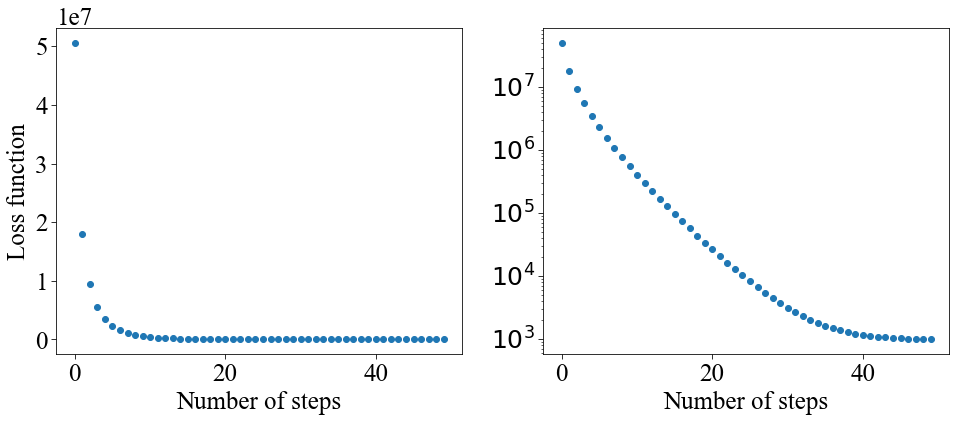

In [36]:
fig,ax  = plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(time_list, loss_list)
ax[0].set_xlabel("Number of steps")
ax[0].set_ylabel("Loss function")
ax[1].scatter(time_list, loss_list)
ax[1].set_xlabel("Number of steps")
#ax[1].set_ylabel("Loss function")
ax[1].set_yscale("log")
plt.show()